In [7]:
import pandas as pd
import numpy as np
import json
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

platform = "twitter"
	# read narrative time series
df_event = pd.read_csv('./data_csv/'+platform+'_event.csv', header=0,index_col=0)

	# read GDELT time series
df_gdelt = pd.read_csv('./data_csv/gdelt.csv', header=0,dtype={'InfoID':str})
df_gdelt.set_index('InfoID', inplace=True)

	# read correlation
df_corr = pd.read_csv('./data_csv/corr_'+platform+'.csv', header=0,index_col=0)

infoIDs = sorted(df_event.index.values) # narrative
	# eventIDs = df_corr.columns.values # GDELT

df_gdelt = df_gdelt.sort_index()

	# Find the popular event ID we use as the input
active_event = df_gdelt[df_gdelt.sum(axis=1).gt(8000)].index.values

	# active_gdelt = list(active_gdelt)
df_gdelt = df_gdelt.loc[active_event,:]
df_corr = df_corr.loc[:,active_event]
df_corr[df_corr.lt(0.3)] = 0
print (df_corr.shape)
print (df_event.shape)


	# k+1,K+2,...,k+n
    
k=0
n=2
path = './train/'+platform+'/'+str(n)
if not os.path.exists(path):
	os.mkdir(path)

fx_train = open(os.path.join(path, 'x.csv'), 'w')
fi_train = open(os.path.join(path, 'ind.csv'), 'w')
fy_train = open(os.path.join(path, 'y.csv'), 'w')

arr_gdelt = df_gdelt.values



ind = 0
    # infoID : narrative name
    # k = window
    # n = number of days
for infoID in infoIDs:
	arr_event = df_event.loc[infoID,:].values
	w = df_corr.loc[infoID,:].values #
	W = []
	for j in range(n):
		W.append(w)

	for i in range(1,25):
		I = arr_gdelt[:,i+k:i+k+n].T # intended dates vs intended narra
		x = I*np.array(W)
		x = x.flatten()
		y = arr_event[i]

		fx_train.write(','.join(str(e) for e in x)+'\n')
		fi_train.write(str(ind)+'\n')
		fy_train.write(str(y)+'\n')


	id = infoID.replace('/','#')
	fx = open('./test/'+platform+'/'+id+'_x.csv', 'w')
	fi = open('./test/'+platform+'/'+id+'_ind.csv', 'w')
	fy = open('./test/'+platform+'/'+id+'_y.csv', 'w')
	fp = open('./test/'+platform+'/'+id+'_y_prev.csv', 'w')

	for i in range(25,39):
		I = arr_gdelt[:,i+k:i+k+n].T
		x = I*np.array(W)
		x = x.flatten()
		y = arr_event[i]
		fx.write(','.join(str(e) for e in x)+'\n')
		fi.write(str(ind)+'\n')
		fy.write(str(y)+'\n')
		print (infoID, str(y))

	ind += 1

	y_prev = arr_event[0:25]
	fp.write(','.join(str(e) for e in y_prev)+'\n')
	fx.close()
	fy.close()
	fp.close()

fx_train.close()
fy_train.close()

(47, 19)
(47, 39)
arrests 470
arrests 513
arrests 462
arrests 11018
arrests 26367
arrests 73161
arrests 47508
arrests 38521
arrests 50196
arrests 103278
arrests 50511
arrests 70033
arrests 59506
arrests 42813
arrests/opposition 162
arrests/opposition 263
arrests/opposition 147
arrests/opposition 5899
arrests/opposition 18799
arrests/opposition 65470
arrests/opposition 38112
arrests/opposition 32264
arrests/opposition 45931
arrests/opposition 95248
arrests/opposition 38174
arrests/opposition 64700
arrests/opposition 53832
arrests/opposition 37569
arrests/opposition/media 0
arrests/opposition/media 2
arrests/opposition/media 0
arrests/opposition/media 1
arrests/opposition/media 1814
arrests/opposition/media 3586
arrests/opposition/media 54
arrests/opposition/media 9
arrests/opposition/media 6
arrests/opposition/media 25
arrests/opposition/media 5
arrests/opposition/media 0
arrests/opposition/media 5948
arrests/opposition/media 588
arrests/opposition/protesters 2
arrests/opposition/protes

maduro/narco 1399
maduro/narco 1563
maduro/narco 1299
maduro/narco 3812
maduro/narco 2147
maduro/narco 22436
maduro/narco 9003
maduro/narco 4068
maduro/narco 4651
maduro/narco 9233
maduro/narco 1925
maduro/narco 2806
maduro/narco 4715
maduro/narco 7775
maduro/russia_support 76
maduro/russia_support 34
maduro/russia_support 20
maduro/russia_support 22
maduro/russia_support 35
maduro/russia_support 1244
maduro/russia_support 939
maduro/russia_support 1195
maduro/russia_support 1812
maduro/russia_support 4471
maduro/russia_support 733
maduro/russia_support 3173
maduro/russia_support 858
maduro/russia_support 118
military 6225
military 6077
military 7659
military 171564
military 108008
military 295387
military 220318
military 100658
military 71469
military 112290
military 82153
military 64502
military 92211
military 47085
military/desertions 67
military/desertions 67
military/desertions 32
military/desertions 25456
military/desertions 5078
military/desertions 7533
military/desertions 3169


In [8]:
arr_gdelt

array([[102,  66,  83, ..., 302, 384, 342],
       [ 11,   4,  24, ...,  59,  78,  68],
       [101, 135, 102, ..., 326, 319, 253],
       ...,
       [  9,   3,   9, ...,  72,  52,  36],
       [ 34,  27,  20, ..., 140, 142,  74],
       [ 50,  22,  37, ...,  97, 110, 115]])

In [9]:
arr = [  77655.91153717,   69317.83901978,   68188.94837952,  504752.35339355,
  568800.90869141 ,2878337.87036133, 1578978.26062012,  665663.09155273,
  718088.80151367 , 796427.9967041  , 535527.5874939  , 466776.96887207,
  489436.62670898,  394332.40637207]
sum(arr)

9812285.5712204

In [111]:
df_corr = pd.read_csv('./data_csv/corr_bert_131_youtube.csv', header=0,index_col=0)
corrmap = {}
for key in df_corr.index:
    corrmap[key] = {}
    ser = df_corr.loc[key,:]
    for ind in range(len(ser)):
        event = int(df_corr.columns.values[ind])
        if ser[ind] < 0.4:
            continue
        if event in active_event:
            corrmap[key][df_corr.columns.values[ind]] =ser[ind]
with open("youtube_bert_nn.json", "w") as outfile:
    json.dump(corrmap, outfile)

In [109]:
corrmap

{'arrests': {10: 0.7738651387031069,
  15: 0.8637866912815553,
  16: 0.7283353120407123,
  22: 0.8353472115440721,
  25: 0.5437678109562168,
  31: 0.5263793937031119,
  32: 0.6279519424886937,
  35: 0.7401832024232073,
  36: 0.7334118834665257,
  39: 0.4648803406117113,
  40: 0.7530822065903077,
  43: 0.8071311677965247,
  51: 0.7658345494949039,
  60: 0.6860828667136842,
  61: 0.639168678807893,
  70: 0.7507453283726453,
  71: 0.7724965469499405,
  72: 0.8276234169254061,
  81: 0.4207679787774622,
  86: 0.6267990738135386,
  100: 0.78705135206853,
  113: 0.6855134985638983,
  122: 0.451047807089205,
  124: 0.7436955380630648,
  130: 0.7929675120418914,
  133: 0.6891430156028552,
  150: 0.6742282391709306,
  161: 0.6086861513477857,
  164: 0.7082860175504379,
  175: 0.5179173956475476,
  180: 0.7541572354338621,
  181: 0.4223415539450627,
  193: 0.7627776501371301},
 'arrests/opposition': {10: 0.7541696321786471,
  15: 0.8526193303660282,
  16: 0.7005552886076825,
  22: 0.8191789515610

In [102]:
df_gdelt = pd.read_csv('./data_csv/gdelt.csv', header=0,dtype={'InfoID':str})
active_event = df_gdelt[df_gdelt.sum(axis=1).gt(400)].index.values
active_event

array([  0,   1,   2,   3,   4,   5,   6,   7,  10,  15,  16,  19,  22,
        25,  31,  32,  34,  35,  36,  39,  40,  43,  47,  51,  55,  56,
        57,  58,  60,  61,  62,  63,  65,  66,  69,  70,  71,  72,  75,
        76,  77,  78,  81,  86,  88,  89, 100, 101, 106, 113, 122, 123,
       124, 130, 133, 146, 148, 149, 150, 151, 161, 164, 166, 167, 168,
       175, 176, 180, 181, 182, 187, 193, 195, 196, 200, 201, 202, 203,
       204, 205, 207, 213, 214, 216, 217])

In [19]:
import copy
import numpy as np
with open('./data_json/gdelt_time_series.json', 'r') as f:
	d = json.loads(f.read())
gdelt = {k: pd.read_json(v, typ='series') for k, v in d.items()}
    
	# GDELT decay
decay_factor = 0.98
Y = copy.deepcopy(gdelt)
for event in gdelt:
	date = gdelt[event].index
	for i in range(len(date)):
		if i == 0:
			continue
		a = decay_factor * gdelt[event][date[i-1]] + Y[event][date[i]] - Y[event][date[i-1]]
		gdelt[event][date[i]] = a
	if event == '010':
		print(gdelt[event][:60])
index = list(gdelt.keys())
column = gdelt[index[0]].index.values

arr = []
for key in index:
	arr.append(gdelt[key].values)
arr = np.array(arr)
df = pd.DataFrame(arr, index=index, columns=column)

2018-12-24     102
2018-12-25      63
2018-12-26      78
2018-12-27      59
2018-12-28      87
2018-12-29      49
2018-12-30      84
2018-12-31     124
2019-01-01      47
2019-01-02      91
2019-01-03     139
2019-01-04     163
2019-01-05     141
2019-01-06     146
2019-01-07     160
2019-01-08     198
2019-01-09     184
2019-01-10     319
2019-01-11     261
2019-01-12     221
2019-01-13     137
2019-01-14     157
2019-01-15     173
2019-01-16     151
2019-01-17      69
2019-01-18     108
2019-01-19      57
2019-01-20      23
2019-01-21     129
2019-01-22     191
2019-01-23     459
2019-01-24    1449
2019-01-25     857
2019-01-26     621
2019-01-27     565
2019-01-28     485
2019-01-29     597
2019-01-30     626
2019-01-31     587
2019-02-01     479
2019-02-02     303
2019-02-03     229
2019-02-04     887
2019-02-05     585
2019-02-06     365
2019-02-07     314
2019-02-08     189
2019-02-09     104
2019-02-10     -22
2019-02-11      38
2019-02-12     145
2019-02-13     204
2019-02-14  

In [79]:
aa = pd.read_csv('./data_csv/corr_bert_131_youtube.csv', header=0,index_col=0)
gmin = 10
gmax = -10
for item in aa.keys():
    amin = min(aa[item])
    amax = max(aa[item])
    if min(aa[item]) < gmin:
        gmim = min(aa[item])
    if max(aa[item]) > gmax:
        gmax = amax
    print(item, amin, amax, np.mean(aa[item]))
print("global", gmin, gmax)

010 0.2995299707655145 0.8161637741260707 0.6547589963283117
011 0.3552945177644499 0.8238403512547365 0.6290373237643211
012 0.21662093795626366 0.7312944678116742 0.5823420063182417
013 0.21905771203816693 0.7848431664143092 0.6257407276573174
014 0.1492914541883949 0.7188467150141834 0.563051971032714
015 0.3468993461014629 0.8560665580148767 0.6921887101785251
016 0.3701589644490673 0.6315422783498822 0.5283562886676844
017 0.08602363682491919 0.4746318490000844 0.33254345745922237
018 -0.1823024019765643 0.11857881645157455 -0.09150416320975202
019 -0.10472935180100833 0.2348769297563128 0.07544655391961863
020 0.2907516317319078 0.8126046806600856 0.6612789082065575
021 -0.22507308754456207 0.5101737178197421 -0.03365035546191723
0211 -0.05011148285857955 0.29814923365612866 0.12624970879550984
0213 0.00994345509242034 0.09526106033843616 0.06510337457117128
0214 0.015015728521080431 0.2070823984343888 0.09090849679590604
022 0.2936905614397554 0.8580345433686131 0.69300201753548

194 -0.04881753158622288 0.18174470051603606 0.007509199566479518
195 -0.16987408932922052 0.24741685469636585 0.07475974311922032
196 -2.0 -2.0 -2.0
201 -0.22010387551850494 -0.10207938722834443 -0.1756839163108873
202 0.029602290777925144 0.4829807257912736 0.36391413445796394
203 -2.0 -2.0 -2.0
global 10 0.9326953933540222


In [60]:
df_gdelt = pd.read_csv('./data_csv/gdelt.csv', header=0,dtype={'InfoID':str})
df_gdelt = df_gdelt.set_index("InfoID")
df_gdelt

,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31,2019-01-01,2019-01-02,...,2019-03-26,2019-03-27,2019-03-28,2019-03-29,2019-03-30,2019-03-31,2019-04-01,2019-04-02,2019-04-03,2019-04-04
InfoID,,,,,,,,,,,,,,,,,,,,,
010,102,60,74,53,80,40,74,112,32,75,...,129,199,286,161,39,0,46,104,180,129
011,0,6,1,0,0,0,0,2,0,0,...,16,4,12,0,0,0,0,1,2,0
012,11,3,22,13,29,18,13,6,0,22,...,93,58,73,73,39,10,22,16,34,22
013,7,9,5,6,6,3,23,13,0,1,...,10,47,66,32,10,0,0,24,16,23
014,4,1,4,2,6,0,0,3,0,2,...,28,16,15,36,14,0,1,36,20,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1,6,2,1,0,0,0,0,0,...,0,8,0,3,2,0,7,0,7,1
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,0,0,0,0,0,0,9,4,0,2,...,0,0,0,0,0,0,0,0,0,0


In [61]:
aa

,010,011,012,013,014,015,016,017,018,019,...,190,191,192,193,194,195,196,201,202,203
arrests,0.773865,0.848027,0.739872,0.758632,0.701278,0.863787,0.728335,0.363697,-0.080385,0.002822,...,0.796902,0.512925,0.709895,0.762778,-0.023767,0.081177,-2.0,-0.187283,0.292768,0.167253
arrests/opposition,0.754170,0.848409,0.722089,0.738721,0.683928,0.852619,0.700555,0.345713,-0.061073,-0.002717,...,0.768035,0.499115,0.698947,0.734080,-0.018033,0.068842,-2.0,-0.180914,0.284142,0.166738
guaido/legitimate,0.620382,0.536179,0.494890,0.600384,0.458356,0.639450,0.317761,0.471339,-0.113912,0.140756,...,0.691277,0.163459,0.270427,0.686708,-0.022245,0.076893,-2.0,-0.125802,0.265486,0.046022
international/aid,0.713033,0.684691,0.721951,0.721333,0.728871,0.666392,0.555508,0.263584,-0.177324,0.147418,...,0.728174,0.453349,0.669093,0.627291,0.015730,0.219583,-2.0,-0.131331,0.235857,0.144955
international/aid_rejected,0.808055,0.656106,0.731320,0.789056,0.617192,0.794068,0.417525,0.552378,-0.110492,0.348383,...,0.852720,0.271890,0.568536,0.852405,-0.049894,0.282176,-2.0,-0.156325,0.422406,0.034020
international/respect_sovereignty,0.844211,0.634240,0.777925,0.827454,0.652220,0.749176,0.371339,0.600254,-0.012663,0.403049,...,0.804920,0.151500,0.513266,0.866271,-0.047537,0.313794,-2.0,-0.107515,0.368752,0.080163
maduro/cuba_support,0.433226,0.290334,0.342780,0.409746,0.301170,0.386248,0.184905,0.391918,-0.229820,0.401276,...,0.413848,0.142376,0.171415,0.476049,-0.049028,0.052300,-2.0,-0.150410,0.214468,0.182743
maduro/dictator,0.563970,0.493081,0.434576,0.529422,0.390472,0.602031,0.318272,0.463655,-0.130938,0.102896,...,0.652275,0.228544,0.251126,0.649079,-0.030327,0.035783,-2.0,-0.140702,0.209972,0.020943
maduro/legitimate,0.791189,0.605403,0.680022,0.758040,0.592680,0.730879,0.339587,0.669716,-0.095556,0.321777,...,0.786209,0.200289,0.422240,0.827299,-0.065414,0.201532,-2.0,-0.118074,0.278976,0.048233
maduro/narco,0.530472,0.526428,0.426175,0.486939,0.405771,0.582107,0.392455,0.380675,-0.148238,0.032510,...,0.578852,0.317404,0.276473,0.601677,-0.054223,-0.065578,-2.0,-0.126924,0.220125,0.198480


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


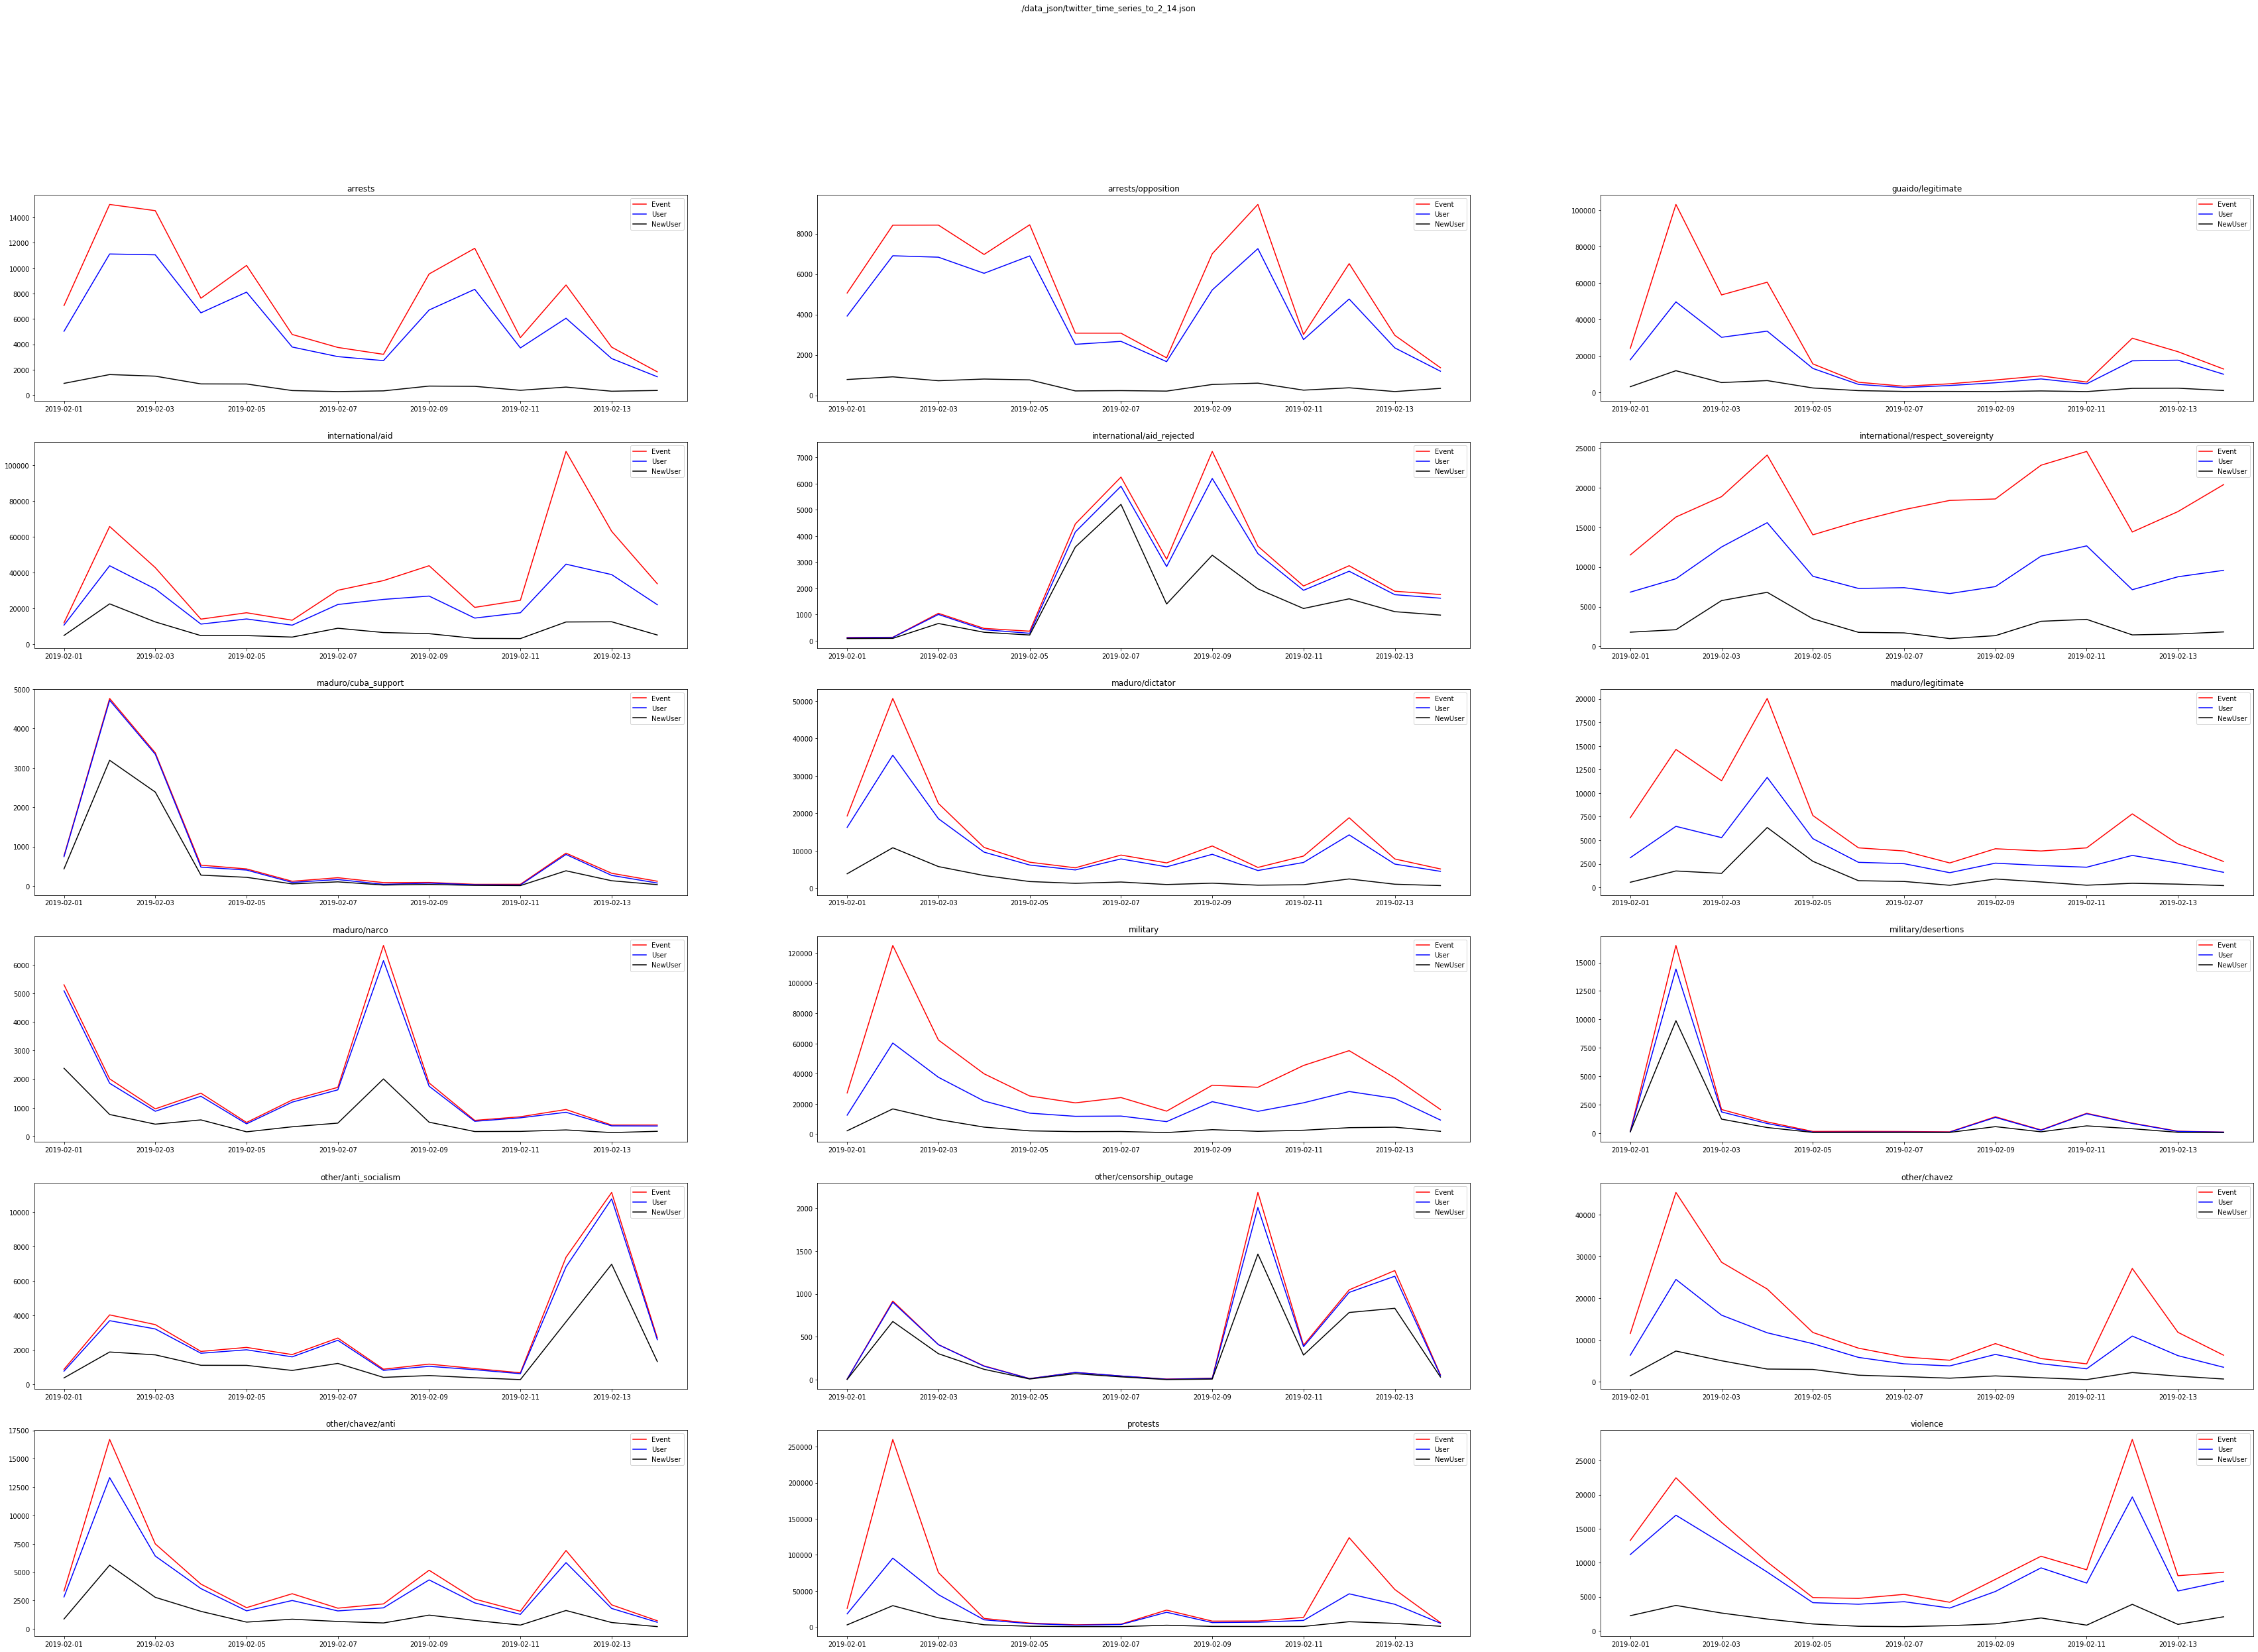

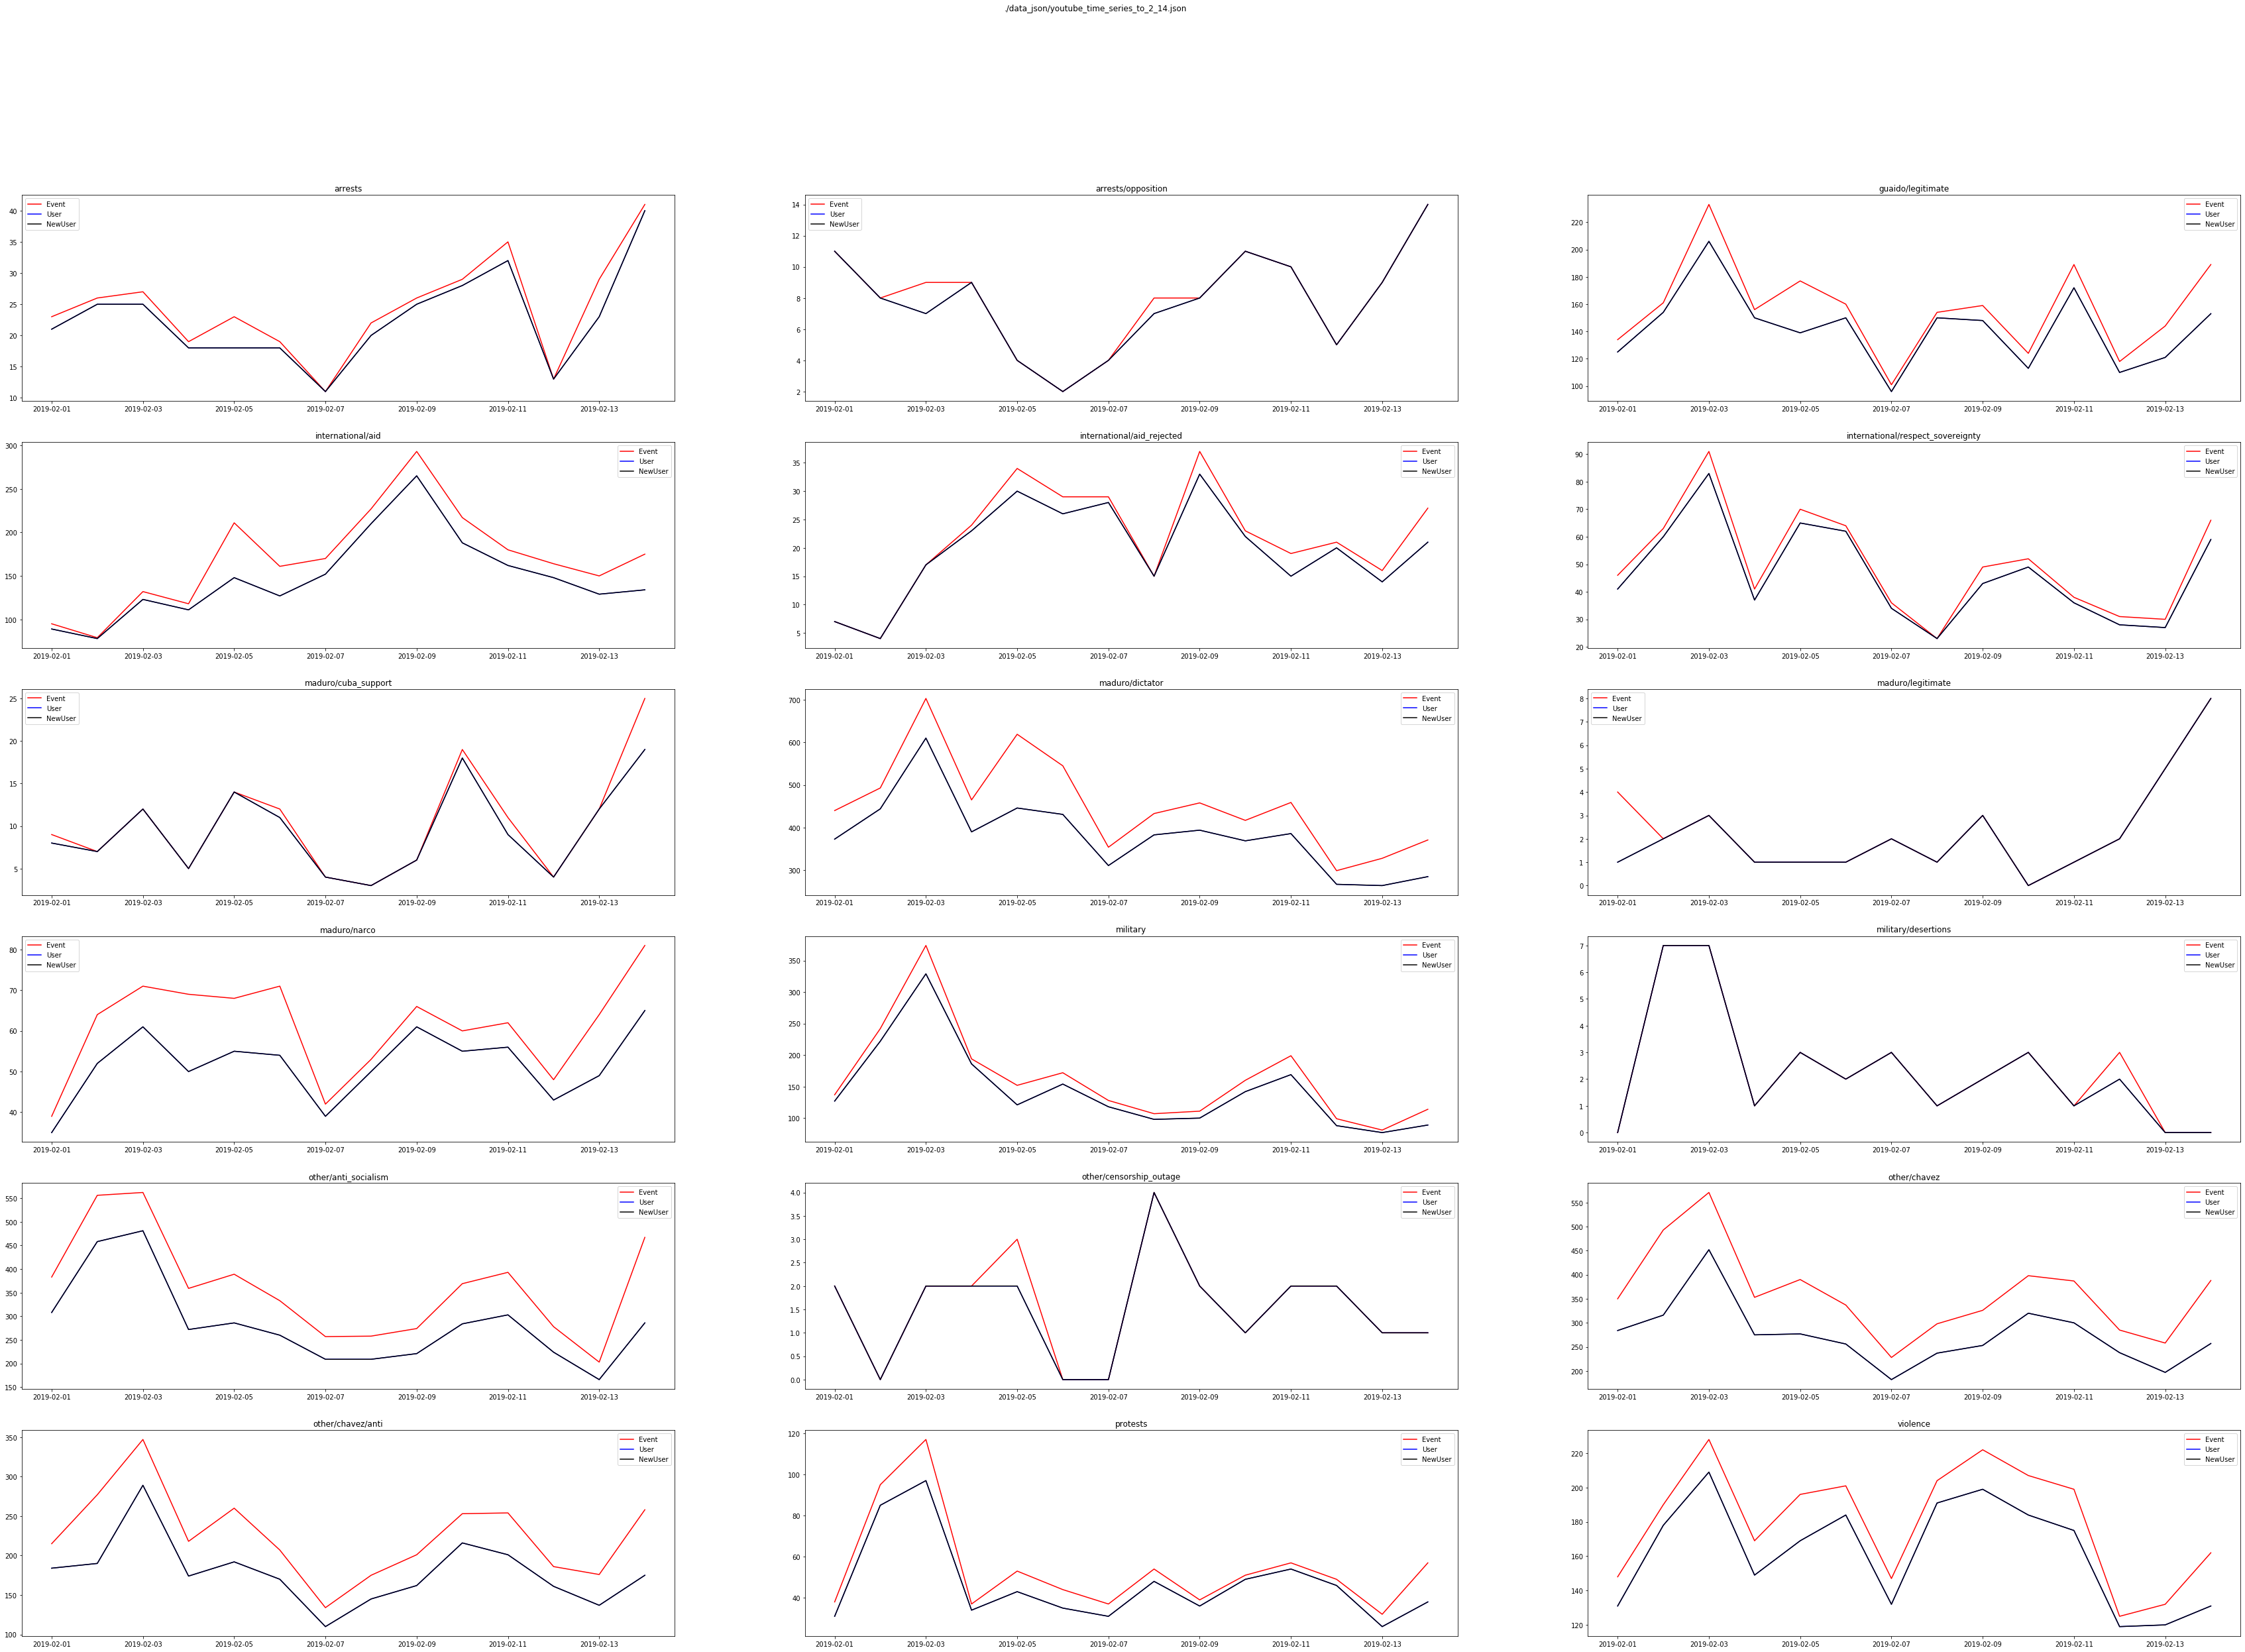

In [63]:
import matplotlib.pyplot as plt
nodelist = ["arrests","arrests/opposition","guaido/legitimate","international/aid","international/aid_rejected",
            "international/respect_sovereignty","maduro/cuba_support","maduro/dictator","maduro/legitimate",
            "maduro/narco","military","military/desertions","other/anti_socialism","other/censorship_outage",
            "other/chavez","other/chavez/anti","protests","violence"]
fnames = ["./data_json/twitter_time_series_to_2_14.json", "./data_json/youtube_time_series_to_2_14.json"]
for file in fnames:
    with open(file) as f:
        final = json.loads(f.read())
        fdict = {k: pd.read_json(v, orient='columns') for k, v in final.items()}
        fig, sub = plt.subplots(6,3, figsize = (60,40))
        for i in range(18):
            r = int(i/3)
            c = i % 3
            sub[r,c].plot(fdict[nodelist[i]].EventCount[-14:], color ="red")
            sub[r,c].plot(fdict[nodelist[i]].UserCount[-14:], color = "blue")
            sub[r,c].plot(fdict[nodelist[i]].NewUserCount[-14:], color = "black")
            sub[r,c].legend(["Event","User","NewUser"])
            sub[r,c].set_title(nodelist[i])
        fig.suptitle(file)
        fig.savefig(file[:-5]+"_gt_narraplot.png")

In [78]:
fnames = ["twitter_UIUC_HYBRID_TEXT_.json"]#, "youtube_UIUC_HYBRID_TEXT_.json"]
for file in fnames:
    with open(file) as f:
        final = json.loads(f.read())
        fdict = {k: pd.read_json(v, orient='columns') for k, v in final.items()}
        for key in fdict.keys():
            ls0 = fdict[key].EventCount.tolist()
            ls1 = fdict[key].UserCount.tolist()
            ls2 = fdict[key].NewUserCount.tolist()
            for i in range(len(ls0)):
                if ls0[i] < ls1[i]:
                    fdict[key].UserCount[i] = 0.99*ls0[i]
                if fdict[key].UserCount[i] < fdict[key].NewUserCount[i]:
                    fdict[key].NewUserCount[i] = 0.99*fdict[key].UserCount[i]
            if file == "youtube_UIUC_NN_GDELT_.json" and (key == 'maduro/legitimate' or key == 'other/censorship_outage'):
                fdict[key].UserCount[7] = 1
                fdict[key].NewUserCount[7] = 1
                fdict[key].EventCount[7] = 1
            fdict[key] = fdict[key].to_json()
        with open(file[:-5]+"autoStop_noScale.json", "w") as outfile:
            json.dump(fdict, outfile)

In [75]:
fnames = ["twitter_HYBRID_TEXT_autoStop_noScale.json"]#, "youtube_HYBRID_TEXT_autoStop_noScale.json"]
for file in fnames:
    with open(file) as f:
        final = json.loads(f.read())
        fdict = {k: pd.read_json(v, orient='columns') for k, v in final.items()}
        fig, sub = plt.subplots(6,3, figsize = (60,40))
        for i in range(18):
            r = int(i/3)
            c = i % 3
            sub[r,c].plot(fdict[nodelist[i]].EventCount, color ="red")
            sub[r,c].plot(fdict[nodelist[i]].UserCount, color = "blue")
            sub[r,c].plot(fdict[nodelist[i]].NewUserCount, color = "black")
            sub[r,c].legend(["Event","User","NewUser"])
            sub[r,c].set_title(nodelist[i])
        fig.suptitle(file)
        fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'twitter_HYBRID_TEXT_autoStop_noScale.json'

In [80]:
df_corr = pd.read_csv('./data_csv/corr_bert_131_twitter.csv', header=0,index_col=0)

In [83]:
df_corr.index

Index(['arrests', 'arrests/opposition', 'guaido/legitimate',
       'international/aid', 'international/aid_rejected',
       'international/respect_sovereignty', 'maduro/cuba_support',
       'maduro/dictator', 'maduro/legitimate', 'maduro/narco', 'military',
       'military/desertions', 'other/anti_socialism',
       'other/censorship_outage', 'other/chavez', 'other/chavez/anti',
       'protests', 'violence'],
      dtype='object')